# Visualize GO analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_filename(label, indir):
    return "../../_m/%s/GO_analysis_%s.xlsx" % (indir, label)


def get_top_GO(tissue, indir, direction):
    try:
        df = pd.read_excel(get_filename(direction, indir))
        df = df.sort_values('p_uncorrected').head(10)
        df['Log10'] = -np.log10(df['p_fdr_bh'])
        df['Tissue'] = tissue
        df['Dir'] = direction
    except FileNotFoundError:
        df = pd.DataFrame()
    return df
    

In [3]:
tissue = 'Caudate'

In [4]:
df = pd.DataFrame()
for indir in ['AAonly', 'EAonly', 'both_multimodal', 'unimodal']:
    df0 = pd.DataFrame()
    for direction in ['all', 'upregulated', 'downregulated']:
        df0 = pd.concat([df0, get_top_GO(tissue, indir, direction)], axis=0)
    df0['Modality'] = indir
    df = pd.concat([df, df0])

fac = []
for ii in range(df.shape[0]):
    xx, yy = df[['ratio_in_study']].iloc[ii, 0].split('/')
    fac.append((int(xx) / int(yy)))
    
df['geneRatio'] = fac
df.to_csv("%s_GO_analysis.txt" % tissue, sep='\t', index=False)
print(np.min(fac), np.max(fac))

0.0 0.6642066420664207


## Plot 

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R -i df
library(ggplot2)
library(tidyverse)

save_plot <- function(p, fn, w, h){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(file=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

plot_GO_modality <- function(modality){
    cbPalette <- c("#000000", "Blue", "Red")
    gg1 = df %>% filter(Modality==modality) %>%
        ggplot(aes(x=Log10, y=name, size=geneRatio, color=Dir)) + 
        geom_point(shape=18, alpha=0.8) + labs(y='', x='-Log10 (FDR)') + 
        theme_bw() + scale_size("GeneRatio", range=c(2,8)) +
        scale_colour_manual(name="Direction", values=cbPalette, 
                            labels=c("All", "Downregulated", "Upregulated")) +
        geom_vline(xintercept = -log10(0.05), linetype = "dotted") +
        theme(axis.text=element_text(size=14),
              axis.title=element_text(size=18, face='bold'),
              strip.text=element_text(size=18, face='bold'))
    return(gg1)
}

R[write to console]: -- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

R[write to console]: v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

R[write to console]: -- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



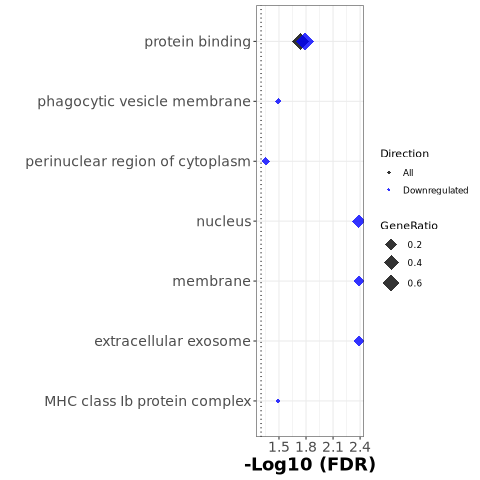

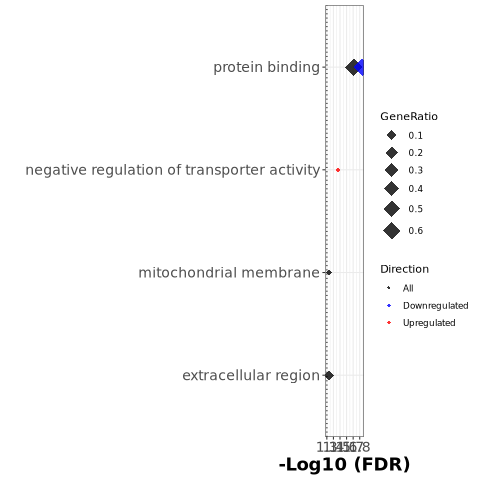

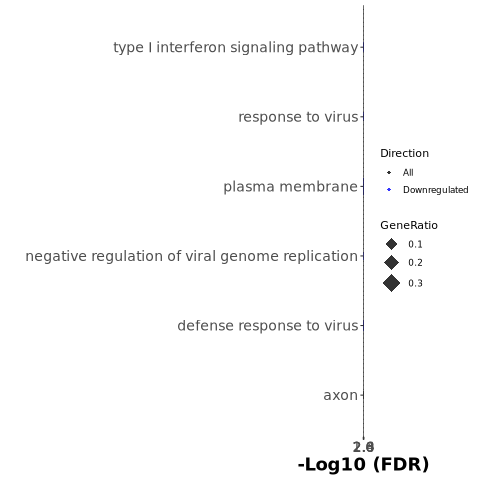

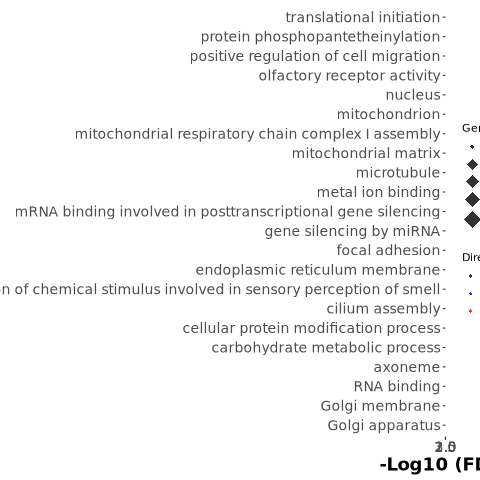

In [8]:
%%R
gg1 = plot_GO_modality("AAonly")
print(gg1)
save_plot(gg1, "caudate_GO_top10_allDirection_AAonly", 7, 6)

gg2 = plot_GO_modality("EAonly")
print(gg2)
save_plot(gg2, "caudate_GO_top10_allDirection_EAonly", 7, 6)

gg3 = plot_GO_modality("both_multimodal")
print(gg3)
save_plot(gg3, "caudate_GO_top10_allDirection_both_multimodal", 9, 6)

gg4 = plot_GO_modality("unimodal")
print(gg4)
save_plot(gg4, "caudate_GO_top10_allDirection_unimodal", 10, 6)